In [39]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

# Se abre la data para su exploración

In [40]:
# Función para cargar el contenido del archivo .pkl
def load_pickle_data(filename):
    with open(filename, 'rb') as f:
        data = pkl.load(f)
    return data

# Cargar el archivo
filename = 'td_ztf_stamp_17_06_20.pkl' 
data = load_pickle_data(filename)

# Visualizar el contenido
print('keys de pkl', data.keys())
print('keys de Test',data['Test'].keys())


keys de pkl dict_keys(['Train', 'Validation', 'Test'])
keys de Test dict_keys(['images', 'labels', 'features'])


In [41]:
data['Train']

{'images': array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [1.84087455e-03, 3.67044093e-04, 1.73346788e-01],
          [1.98828382e-03, 4.14328562e-04, 1.70802355e-01],
          [2.12824903e-03, 6.52466551e-04, 1.71260193e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [1.72108761e-03, 7.32960762e-04, 1.76224440e-01],
          [1.48706336e-03, 3.94942763e-04, 1.77301437e-01],
          [2.02896260e-03, 5.32542123e-04, 1.72201887e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [1.59188616e-03, 4.94679029e-

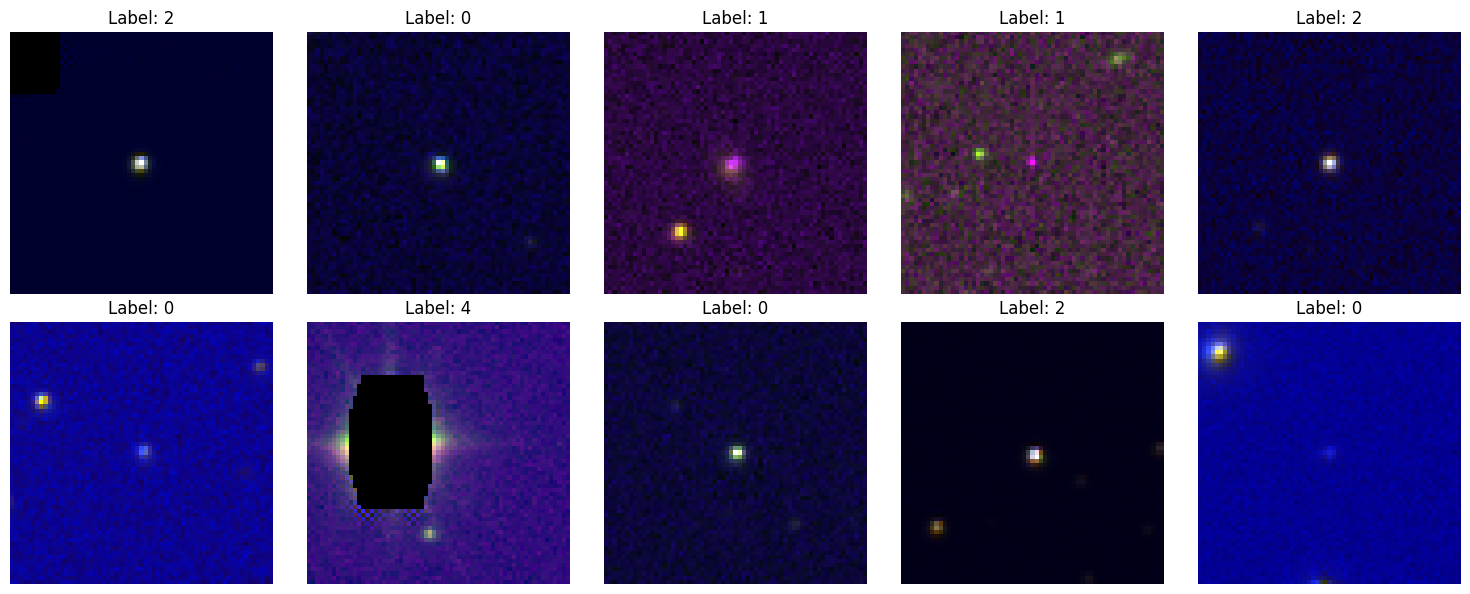

tipo de datos de las imágenes <class 'numpy.ndarray'>
Forma de los datos de las imgágenes (72710, 63, 63, 3)


In [42]:
# Extracting the train images and labels from the dataset
train_images = data['Train']['images']
train_labels = data['Train']['labels']

# Plotting the first few images along with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, img, lbl in zip(axes.ravel(), train_images, train_labels):
    ax.imshow(img)  
    ax.axis('off')
    ax.set_title(f'Label: {lbl}')

plt.tight_layout()
plt.show()

# Returning the shape of the images
print('tipo de datos de las imágenes',type(train_images))
print('Forma de los datos de las imgágenes', train_images.shape)

### Representación
72710: hay 72710 elementos
63: altura de 63 píxeles.
63: anchura de 63 píxeles.
3: diferencias, 3 imagenes


In [43]:
def separar_imagenes(imagenes):
    '''Separa las imágenes en sus 3 componentes: science, reference y difference'''
    
    science_images = imagenes[:, :, :, 0]
    reference_images = imagenes[:, :, :, 1]
    difference_images = imagenes[:, :, :, 2]
    return science_images, reference_images, difference_images

science_images, reference_images, difference_images = separar_imagenes(data['Train']['images'])

print('dimensiones de imágenes science:', science_images.shape)
print('dimensiones de imágenes reference:', reference_images.shape)
print('dimensiones de imágenes difference:', science_images.shape)

dimensiones de imágenes science: (72710, 63, 63)
dimensiones de imágenes reference: (72710, 63, 63)
dimensiones de imágenes difference: (72710, 63, 63)


In [44]:
def checkear_dimensiones(imagenes):
    '''Función que checkea si los arreglos de imágenes tienen las mismas dimensiones'''
    contador = 0
    for img in imagenes:
        if img.shape != (63,63):
            contador += 1
        else:
            continue
    return contador

# Verificar dimensiones para cada conjunto
incorrect_science = checkear_dimensiones(science_images)
incorrect_reference = checkear_dimensiones(reference_images)
incorrect_difference = checkear_dimensiones(difference_images)

print(f"Imágenes con dimensiones incorrectas en science: {incorrect_science}")
print(f"Imágenes con dimensiones incorrectas en reference: {incorrect_reference}")
print(f"Imágenes con dimensiones incorrectas en difference: {incorrect_difference}")

Imágenes con dimensiones incorrectas en science: 0
Imágenes con dimensiones incorrectas en reference: 0
Imágenes con dimensiones incorrectas en difference: 0


In [45]:
def encuentraImagenesConNaN(images):
    '''Encuentra los índices de imágenes que contienen al menos un píxel NaN'''
    tieneNaN = np.any(np.isnan(images), axis=(1,2))
    return np.where(tieneNaN)[0]

# Verificar imágenes con NaN para cada conjunto
science_nan_indices = encuentraImagenesConNaN(science_images)
reference_nan_indices = encuentraImagenesConNaN(reference_images)
difference_nan_indices = encuentraImagenesConNaN(difference_images)

print(f"Índices de imágenes science con al menos un píxel NaN: {science_nan_indices}")
print(f"Índices de imágenes reference con al menos un píxel NaN: {reference_nan_indices}")
print(f"Índices de imágenes difference con al menos un píxel NaN: {difference_nan_indices}")

Índices de imágenes science con al menos un píxel NaN: []
Índices de imágenes reference con al menos un píxel NaN: []
Índices de imágenes difference con al menos un píxel NaN: []


In [46]:
def recortar_imagenes(img_array):
    """Recorta las imágenes a una dimensión menor de 21x21'\\
    Parámetros:
    - img_array: numpy array con las imágenes a recortar.
    - crop_size: tupla que indica el tamaño del recorte.
    
    Retorna:
    - Un numpy array con las imágenes recortadas.
    """
    crop_size = (21, 21)
    y, x = img_array.shape[1:3] # y contendrá la altura (número de filas) y x contendrá el ancho
    start_x = x // 2 - (crop_size[1] // 2) #dónde comenzar el recorte en el eje x. x // 2 nos da el punto central del ancho.
    start_y = y // 2 - (crop_size[0] // 2) #Al restarle la mitad del ancho deseado del recorte se obtiene el punto de inicio
    return img_array[:, start_y:start_y + crop_size[0], start_x:start_x + crop_size[1]]
    
cropped_science_images = recortar_imagenes(science_images)
cropped_reference_images = recortar_imagenes(reference_images)
cropped_difference_images = recortar_imagenes(difference_images)

print('dimensiones de imágenes science:', cropped_science_images.shape)
print('dimensiones de imágenes reference:', cropped_reference_images.shape)
print('dimensiones de imágenes difference:', cropped_difference_images.shape)

dimensiones de imágenes science: (72710, 21, 21)
dimensiones de imágenes reference: (72710, 21, 21)
dimensiones de imágenes difference: (72710, 21, 21)


In [47]:
def check_normalization(images):
    '''Verifica los valores mínimos y máximos de las imágenes'''
    return images.min(), images.max()

# Verificar la normalización para cada conjunto
science_min, science_max = check_normalization(cropped_science_images)
reference_min, reference_max = check_normalization(cropped_reference_images)
difference_min, difference_max = check_normalization(cropped_difference_images)

print(f"Valores en imágenes science: min = {science_min}, max = {science_max}")
print(f"Valores en imágenes reference: min = {reference_min}, max = {reference_max}")
print(f"Valores en imágenes difference: min = {difference_min}, max = {difference_max}")


Valores en imágenes science: min = 0.0, max = 1.0
Valores en imágenes reference: min = 0.0, max = 1.0
Valores en imágenes difference: min = 0.0, max = 1.0


In [48]:
def verificar_datos(data):
    for key in ['Train', 'Validation', 'Test']:
        dataset = data[key]
        
        # Verificar que las keys 'labels' y 'features' existen
        assert 'labels' in dataset, f"'labels' no encontrado en {key}"
        assert 'features' in dataset, f"'features' no encontrado en {key}"
        
        # Verificar que no haya valores None
        assert dataset['labels'] is not None, f"Valores None encontrados en 'labels' de {key}"
        assert dataset['features'] is not None, f"Valores None encontrados en 'features' de {key}"
        
        # Verificar que las dimensiones coincidan
        num_images = len(dataset['images'])
        assert len(dataset['labels']) == num_images, f"Dimensiones no coinciden entre 'images' y 'labels' en {key}"
        assert len(dataset['features']) == num_images, f"Dimensiones no coinciden entre 'images' y 'features' en {key}"
        
        # Verificar que las labels estén dentro del rango esperado
        unique_labels = np.unique(dataset['labels'])
        for label in unique_labels:
            assert label in [0, 1, 2, 3, 4], f"Etiqueta desconocida {label} encontrada en {key}"
    
        
    print("Todas las verificaciones pasaron de pana.")

# Ejecutar la función de verificación
verificar_datos(data)


Todas las verificaciones pasaron de pana.


## Se guardan los datos de entrenamiento, validación y test

In [49]:
import pickle as pkl

# Recortar las imágenes de validación y prueba
cropped_val_images = recortar_imagenes(data['Validation']['images'])
cropped_test_images = recortar_imagenes(data['Test']['images'])

# Actualizar el diccionario de datos con las imágenes recortadas
data['Train']['images'] = recortar_imagenes(data['Train']['images'])
data['Validation']['images'] = cropped_val_images
data['Test']['images'] = cropped_test_images

# Guardar el diccionario actualizado en un archivo .pkl
output_filename = 'processed_data.pkl'
with open(output_filename, 'wb') as f:
    pkl.dump(data, f)

print(f"Datos procesados guardados en {output_filename}")


Datos procesados guardados en processed_data.pkl
